In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

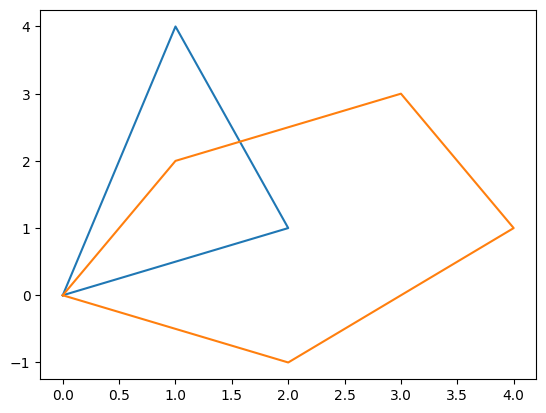

In [4]:
triangle = np.array([[0, 0], [2, 1], [1, 4], [0, 0]])
plt.plot(triangle[:, 0], triangle[:, 1], label='triangle')

pentagon = np.array([[0, 0], [1, 2], [3, 3], [4, 1], [2, -1], [0, 0]])
plt.plot(pentagon[:, 0], pentagon[:, 1], label='pentagon')

[[ 0.          0.        ]
 [ 0.70710678  2.12132034]
 [-2.12132034  3.53553391]
 [ 0.          0.        ]]
[[ 0.          0.        ]
 [-1.23205081  1.8660254 ]
 [-1.09807621  4.09807621]
 [ 1.1339746   3.96410162]
 [ 1.8660254   1.23205081]
 [ 0.          0.        ]]


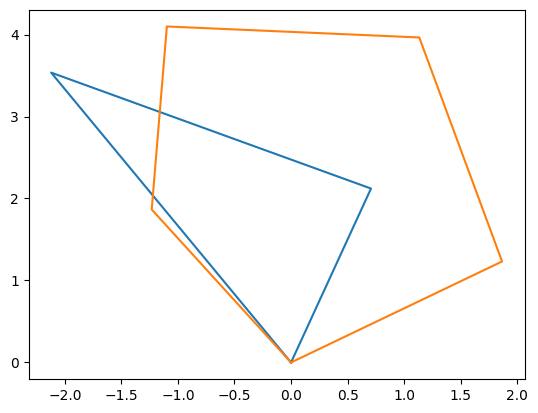

In [12]:
#rotating
def matrix_rotation(matrix, angle):
    angle_rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)], [np.sin(angle_rad),  np.cos(angle_rad)]]) #trigonometrix functions expect angles to be in radians
    rotated_matrix = matrix.dot(rotation_matrix.T) #dot for dot product
    plt.plot(rotated_matrix[:, 0], rotated_matrix[:, 1])
    print(rotated_matrix)
    

matrix_rotation(triangle, 45)
matrix_rotation(pentagon, 60)

[[0 0]
 [4 2]
 [2 8]
 [0 0]]
[[ 0  0]
 [ 3  6]
 [ 9  9]
 [12  3]
 [ 6 -3]
 [ 0  0]]


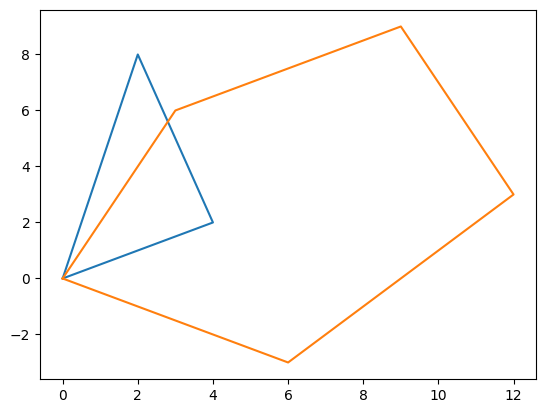

In [13]:
#масштабування
def matrix_scaling(matrix, scalar):
    scaled_matrix = matrix * scalar
    plt.plot(scaled_matrix[:, 0], scaled_matrix[:, 1])
    print(scaled_matrix)

matrix_scaling(triangle, 2)
matrix_scaling(pentagon, 3)

[[ 0  0]
 [-2  1]
 [-1  4]
 [ 0  0]]
[[ 0  0]
 [ 1 -2]
 [ 3 -3]
 [ 4 -1]
 [ 2  1]
 [ 0  0]]


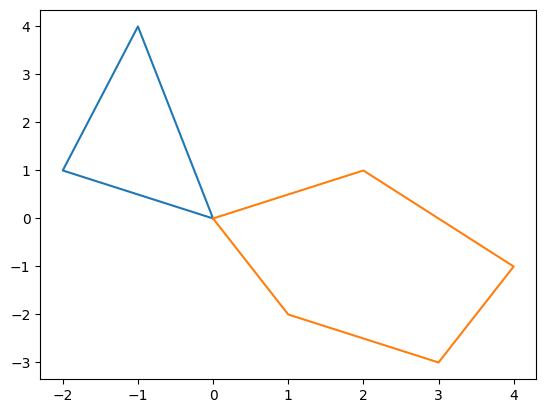

In [14]:
#mirroring
def matrix_mirroring(matrix, axis):
    if axis == 'x':
        mirrored_matrix = matrix * np.array([-1, 1]) 
        plt.plot(mirrored_matrix[:, 0], mirrored_matrix[:, 1])
        print(mirrored_matrix)
    
    if axis == 'y':
        mirrored_matrix = matrix * np.array([1, -1]) 
        plt.plot(mirrored_matrix[:, 0], mirrored_matrix[:, 1])
        print(mirrored_matrix)
    
matrix_mirroring(triangle, 'x')
matrix_mirroring(pentagon, 'y')

[[0.         0.        ]
 [2.70710678 1.        ]
 [3.82842712 4.        ]
 [0.         0.        ]]
[[0.         0.        ]
 [1.         2.8660254 ]
 [3.         5.59807621]
 [4.         4.46410162]
 [2.         0.73205081]
 [0.         0.        ]]


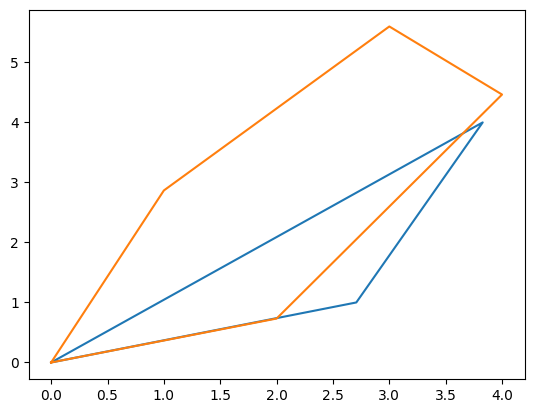

In [15]:
#tilting
def matrix_tilting(matrix, axis, angle):
    angle_rad = np.radians(angle)
    if axis == 'x':
        matrix_tilting = np.array([[1, np.sin(angle_rad)], [0, 1]])
    if axis == 'y':
        matrix_tilting = np.array([[1, 0], [np.sin(angle_rad), 1]])
        
    tilted_matrix = matrix.dot(matrix_tilting.T) #.T transposes matrix
    plt.plot(tilted_matrix[:, 0], tilted_matrix[:, 1])
    print(tilted_matrix)
    
matrix_tilting(triangle, 'x', 45)
matrix_tilting(pentagon, 'y', 60)

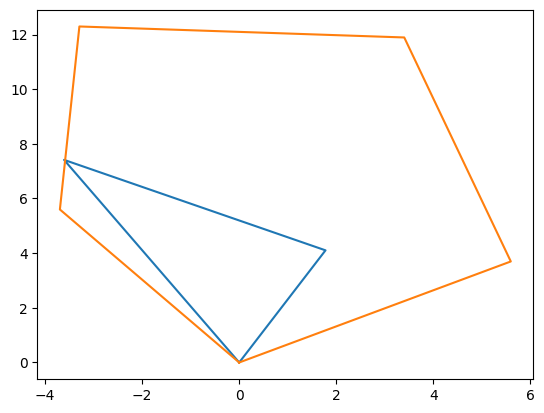

In [5]:
#custom
def matrix_custom_transforming(matrix, scalar, angle):
    scaled_matrix = matrix * scalar
    angle_rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)], [np.sin(angle_rad),  np.cos(angle_rad)]]) #trigonometrix functions expect angles to be in radians
    rotated_matrix = scaled_matrix.dot(rotation_matrix.T) #dot for dot product
    plt.plot(rotated_matrix[:, 0], rotated_matrix[:, 1])

matrix_custom_transforming(triangle, 2, 40)
matrix_custom_transforming(pentagon, 3, 60)

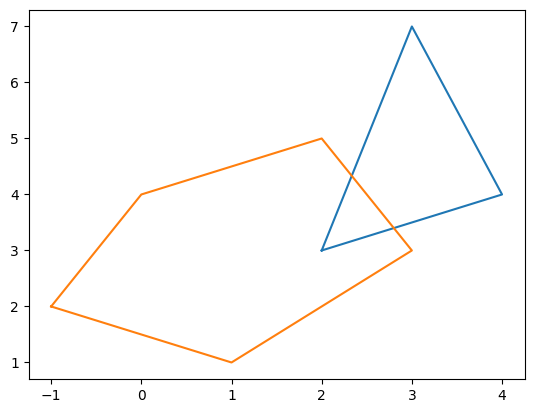

In [17]:
#3. translation
def matrix_translation(matrix, cx, cy):
    coordinates = np.array([[1, 0, cx], [0, 1, cy], [0, 0, 1]])
    homogeneous_matrix = np.hstack([matrix, np.ones((matrix.shape[0], 1))])
    translated_matrix = homogeneous_matrix.dot(coordinates.T)
    plt.plot(translated_matrix[:, 0], translated_matrix[:, 1])
    
matrix_translation(triangle, 2, 3)
matrix_translation(pentagon, -1, 2)

З операції зсуву можна зробити висновок, що маніпуляції з першими координатами в array впливають на вісь х, а маніпуляції з другими координатами - на вісь у. Третя координата потрбіна для свторення однорідної матриці, що зробить можливим операцію зсуву.

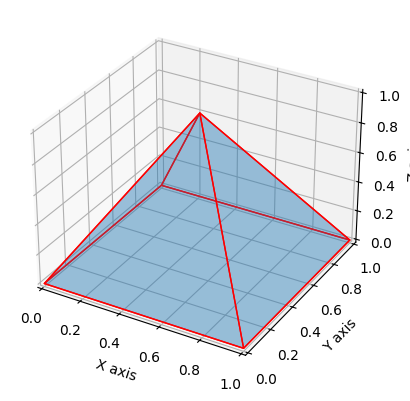

In [18]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

pyramid_vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0.5, 0.5, 1]
])

pyramid_faces = [
    [pyramid_vertices[0], pyramid_vertices[1], pyramid_vertices[4]],
    [pyramid_vertices[1], pyramid_vertices[2], pyramid_vertices[4]],
    [pyramid_vertices[2], pyramid_vertices[3], pyramid_vertices[4]],
    [pyramid_vertices[3], pyramid_vertices[0], pyramid_vertices[4]],
    [pyramid_vertices[0], pyramid_vertices[1], pyramid_vertices[2], pyramid_vertices[3]]
]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

poly3d = Poly3DCollection(pyramid_faces, edgecolors='r', alpha=.25)
ax.add_collection3d(poly3d)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()


[[ 0.          0.        ]
 [ 0.70710678  2.12132034]
 [-2.12132034  3.53553391]
 [ 0.          0.        ]]
[[ 0.          0.        ]
 [-1.23205081  1.8660254 ]
 [-1.09807621  4.09807621]
 [ 1.1339746   3.96410162]
 [ 1.8660254   1.23205081]
 [ 0.          0.        ]]


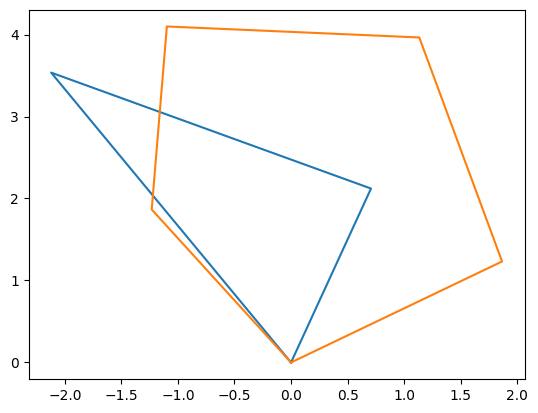

In [19]:
#rotating 2.0
def cv_matrix_rotation(matrix, angle):
    angle_rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)], [np.sin(angle_rad),  np.cos(angle_rad)]]) #trigonometrix functions expect angles to be in radians
    rotated_matrix = cv.transform(np.array([matrix]), rotation_matrix)[0]
    plt.plot(rotated_matrix[:, 0], rotated_matrix[:, 1])

matrix_rotation(triangle, 45)
matrix_rotation(pentagon, 60)

[[0 0]
 [4 2]
 [2 8]
 [0 0]]
[[ 0  0]
 [ 3  6]
 [ 9  9]
 [12  3]
 [ 6 -3]
 [ 0  0]]


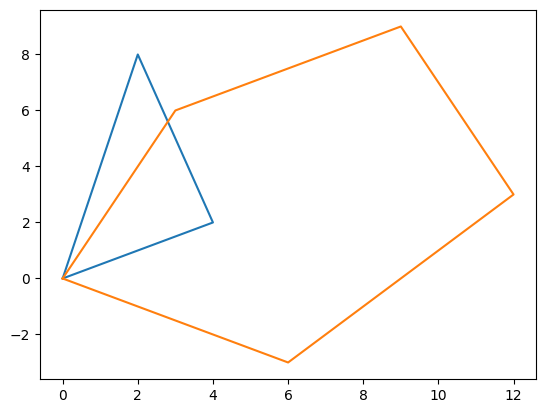

In [20]:
#scaling 2.0
def cv_matrix_scaling(matrix, scalar):
    scaling_matrix = np.array([[scalar, 0], [0, scalar]])
    scaled_matrix = cv.transform(np.array([matrix]), scaling_matrix)[0]
    plt.plot(scaled_matrix[:, 0], scaled_matrix[:, 1])

matrix_scaling(triangle, 2)
matrix_scaling(pentagon, 3)

[[ 0  0]
 [-2  1]
 [-1  4]
 [ 0  0]]
[[ 0  0]
 [ 1 -2]
 [ 3 -3]
 [ 4 -1]
 [ 2  1]
 [ 0  0]]


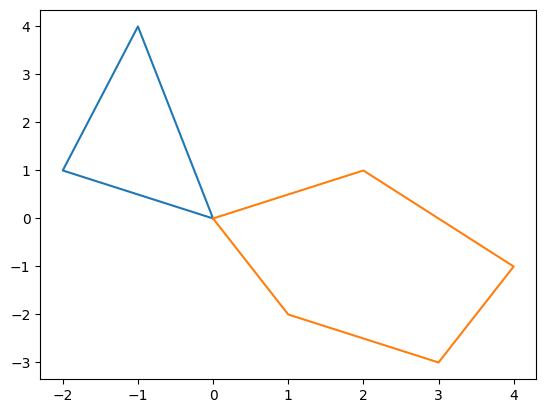

In [21]:
#mirroring 2.0
def cv_matrix_mirroring(matrix, axis):
    if axis == 'x':
        mirroring_matrix = np.array([[-1, 0], [0, 1]]) 
        
    
    if axis == 'y':
        mirroring_matrix = np.array([[1, 0], [0, -1]]) 
        
    mirrored_matrix = cv.transform(np.array([matrix]), mirroring_matrix)[0]
    plt.plot(mirrored_matrix[:, 0], mirrored_matrix[:, 1])
    
matrix_mirroring(triangle, 'x')
matrix_mirroring(pentagon, 'y')

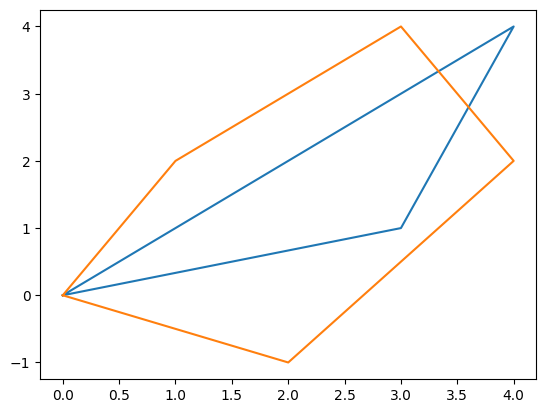

In [22]:
#tilting 2.0
def cv_matrix_tilting(matrix, axis, angle):
    angle_rad = np.radians(angle)
    if axis == 'x':
        matrix_tilting = np.array([[1, np.sin(angle_rad), 0], [0, 1, 0]])
    if axis == 'y':
        matrix_tilting = np.array([[1, 0, 0], [np.sin(angle_rad), 1, 0]])
        
    tilted_matrix = cv.transform(np.array([matrix]), matrix_tilting)[0]
    plt.plot(tilted_matrix[:, 0], tilted_matrix[:, 1])
    
cv_matrix_tilting(triangle, 'x', 45)
cv_matrix_tilting(pentagon, 'y', 10)

Готові функції бібліотеки cv показують ті самі зображення, що й старі функції.

In [23]:
#cv image
img = cv.imread('Rio.jpeg')

rows, cols, _ = img.shape

M = np.float32([[1, 0, 100], [0, 1, 50]])

dst = cv.warpAffine(img, M, (cols, rows))

cv.imshow('img', dst)
cv.waitKey(0)
cv.destroyAllWindows()

cv_matrix_rotation(img, 40)


2024-06-03 22:11:34.095 Python[5439:199295] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [ ]:
cv_matrix_mirroring(img, 'x')

In [ ]:
cv_matrix_tilting(img, 'y', 60)

# Теоретичні запитання

1. Що таке лінійні трансформації? Це дії над векторами у такій спосіб, що зберігаються операції додавання векторів та множення векторів на скаляр. 
2. Як і в яких галузях застосовуються лінійні трансформації? У комп'ютерній графіці, будуванні економічних моделей, фізиці.
3. Що таке матриця лінійної трансформації та як її можна інтерпретувати? Це матриця, завдяки якій можна оперувати над впекторами задля їхньої трансформації, заданої матрицею.
4. Які особливості та властивості має матриця обертання? Вона працює з кутом обертання, і в результаті вектори обернені, а вісі фіксовані.
5. Чи залежить фінальний результат від порядку трансформацій? Провести експерименти з фігурами або зображеннями з частин 1-2. Так, залежить, результат буде різним.
6. Була здійснена якась довільна лінійна трансформація; як знайти матрицю лінійної трансформації, що поверне все до початкового вигляду? Чи завжди можна здійснити обернену трансформацію? Треба застосувати обернену матрицю до цієї матриці. Умовою здійснення оберненої трансформації є детермінант більше нуля.
7. Модуль визначника матриці трансформації менше 1, які висновки можна зробити про дану трансформацію (як змінюється простір при даній трансформації)? А якщо більше 1? Дорівнює 1? Дорівнює 0? менше 1: стискає простір; більше 1 - розширює простір; дорівнює 1 - зберігає розмір; дорівнює 0 - зменшує розмірність.


In [ ]:
#5
matrix_tilting(pentagon, 'x', 60)
matrix_rotation(pentagon, 60)

AttributeError: 'NoneType' object has no attribute 'dot'

In [ ]:
matrix_rotation(pentagon, 60)
matrix_tilting(pentagon, 'x', 60)

AttributeError: 'NoneType' object has no attribute 'dot'